# PISA Performance Scores by Country - EDA

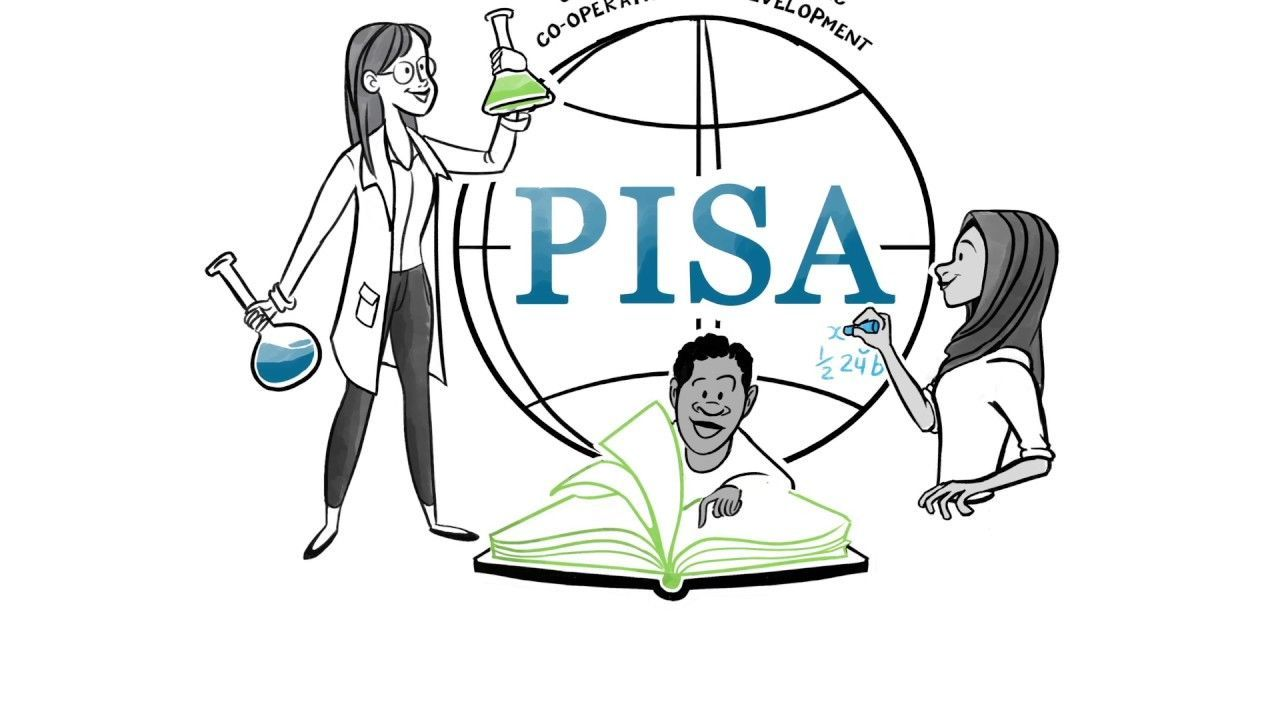


In this notebook, we will conduct an exploratory data analysis on a dataset containing information about the PISA tests.

The PISA (Programme for International Student Assessment) tests are large-scale assessments conducted by the Organisation for Economic Co-operation and Development (OECD) to measure the academic performance of 15-year-old students in reading, mathematics, and science. These tests are administered every three years to students across various countries and aim to assess how educational systems prepare youth to tackle real-world challenges. The goal is to provide insights into the effectiveness of educational systems and enable comparisons between countries in terms of educational achievements.

Source: https://www.kaggle.com/datasets/thedevastator/pisa-performance-scores-by-country

Import libraries:

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
PISA_df = pd.read_csv('/content/OECD PISA data.csv')
PISA_df.drop('index', axis=1, inplace=True)
PISA_df

,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,AUS,PISAMATH,BOY,2003,527.000
1,AUS,PISAMATH,BOY,2006,527.000
2,AUS,PISAMATH,BOY,2009,519.000
3,AUS,PISAMATH,BOY,2012,510.115
4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...
2082,CRI,PISASCIENCE,BOY,2018,420.000
2083,CRI,PISASCIENCE,GIRL,2018,411.000
2084,LTU,PISASCIENCE,TOT,2018,482.000
2085,LTU,PISASCIENCE,BOY,2018,479.000


### General information about the dataset:

In [68]:
PISA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   2087 non-null   object 
 1   INDICATOR  2087 non-null   object 
 2   SUBJECT    2087 non-null   object 
 3   TIME       2087 non-null   int64  
 4   Value      2087 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.6+ KB


In [69]:
PISA_df.dropna(inplace=True)

No null values

In [70]:
PISA_df['Value'].describe()

count    2087.000000
mean      487.644684
std        38.644532
min       348.000000
25%       475.000000
50%       495.000000
75%       512.000000
max       574.000000
Name: Value, dtype: float64

Scores go from 348 to 512 and the mean score is 487.64.



In [71]:
countries = PISA_df['LOCATION'].nunique()
print(f'{countries} countries participated on the exams.')

47 countries participated on the exams.


In [72]:
PISA_df['SUBJECT'].value_counts()

TOT     701
BOY     693
GIRL    693
Name: SUBJECT, dtype: int64

There are the same amount of boys and girls

## In which subjects are boys better and in which ones are girls better?

<Axes: xlabel='INDICATOR', ylabel='Value'>

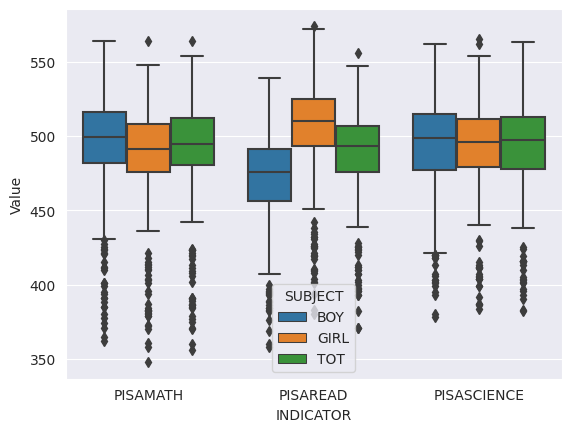

In [73]:
sns.boxplot(x='INDICATOR', y='Value', hue='SUBJECT', data=PISA_df)

We can observe how, in average, boys obtain better qualifications in maths, girls in reading and both obtain similar qualifications in science.

## How did the average worldwide score vary over the years?

In [74]:
years = PISA_df['TIME'].unique()
average_per_year = []
years = np.sort(years)
for i in years:
  average_per_year.append(PISA_df[PISA_df['TIME']==i]['Value'].mean().round(2))

years

array([2000, 2003, 2006, 2009, 2012, 2015, 2018])

Text(0, 0.5, 'Average Score')

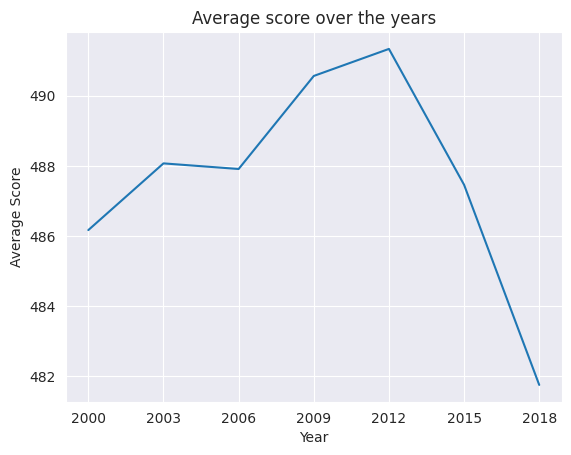

In [75]:
plt.plot(years, average_per_year)
plt.title('Average score over the years')
plt.xlabel('Year')
plt.xticks(years)
plt.ylabel('Average Score')

It can be observed how since 2012 the average scores worlwide decreased hugely.

## How many countries participated in the tests?

In [76]:
PISA_df.LOCATION.value_counts()

AUS     54
IRL     54
SWE     54
BRA     54
PRT     54
POL     54
NOR     54
NZL     54
IDN     54
MEX     54
KOR     54
JPN     54
ITA     54
ISL     54
HUN     54
GRC     54
DEU     54
FRA     54
FIN     54
DNK     54
CZE     54
CAN     54
BEL     54
CHE     54
LUX     53
TUR     51
USA     51
SVK     51
ESP     51
NLD     51
OAVG    49
CHL     48
ISR     48
RUS     47
SVN     45
GBR     45
EST     45
AUT     45
LVA     30
COL     18
SGP      9
HKG      9
PER      9
TWN      9
MAC      9
CRI      9
LTU      9
Name: LOCATION, dtype: int64

## What countries achieved the highest scores?

<Axes: xlabel='LOCATION', ylabel='Value'>

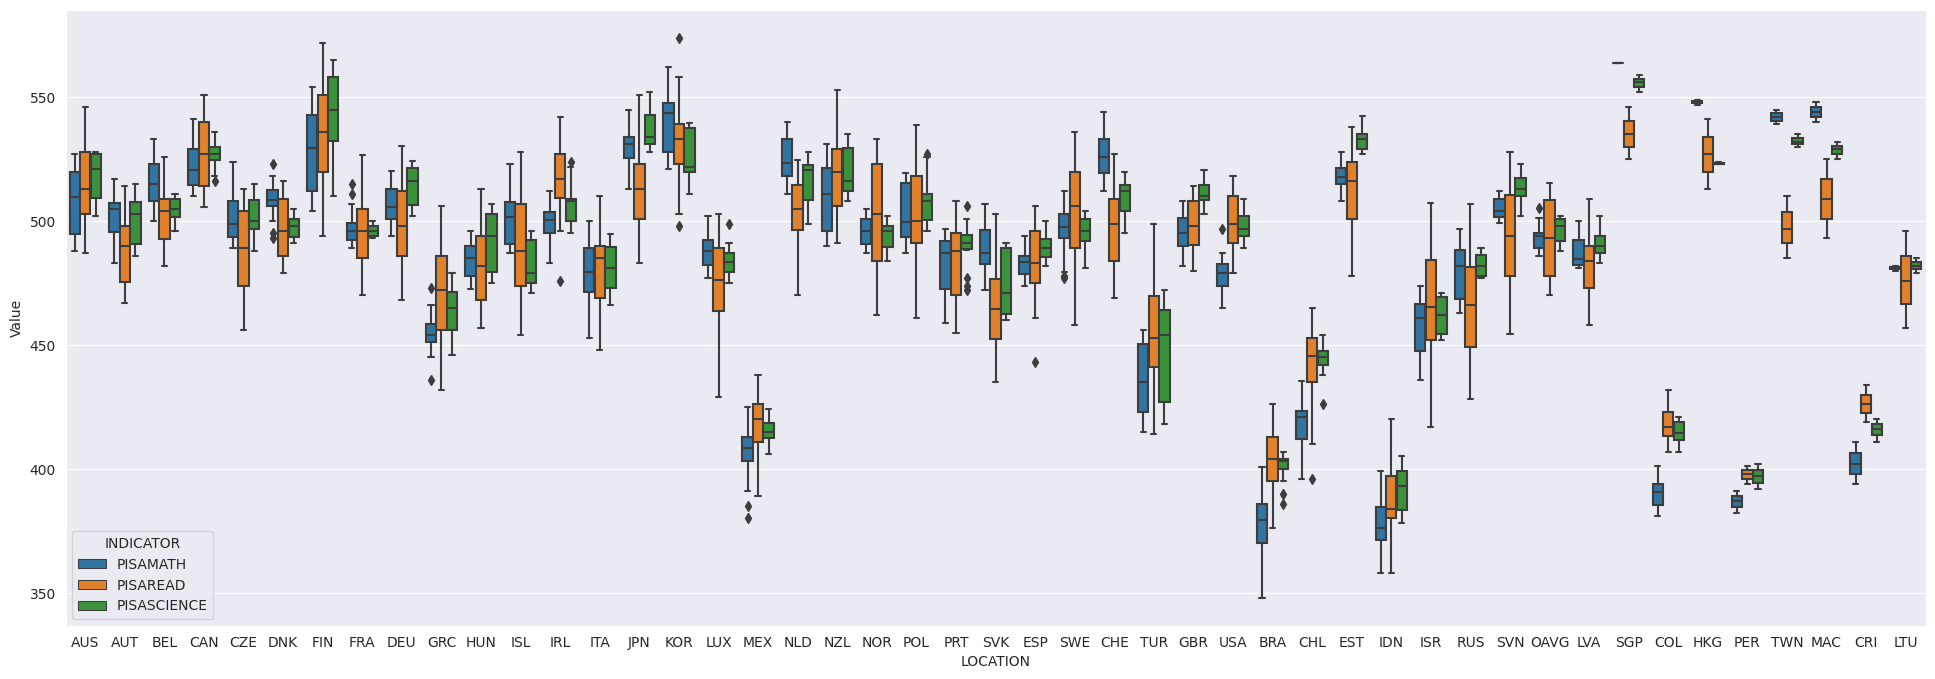

In [77]:
plt.figure(figsize=(24,8))

sns.boxplot(y='Value', x='LOCATION', hue='INDICATOR', data=PISA_df)



It can be observed that the best results were achieved by Finland, Canada, and Korea.

Particular cases can be noted, such as Japan or Singapore, which showed high scores in mathematics and science but significantly lower scores in reading comprehension.

The lowest results were seen in Brazil, Indonesia, Peru, Colombia, and Mexico, with mathematics being the area with the poorest results for all five countries.

## How did the average score vary for different countries over the years?

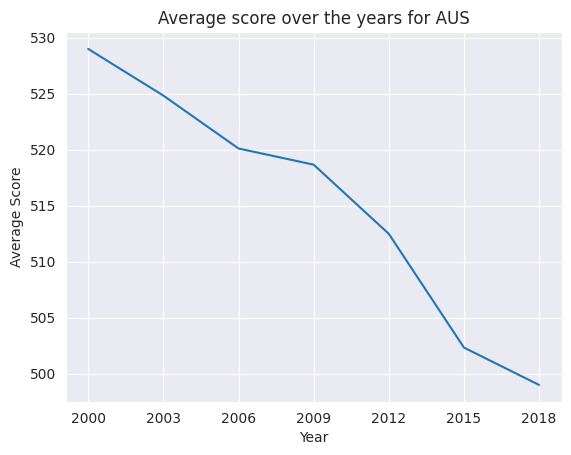

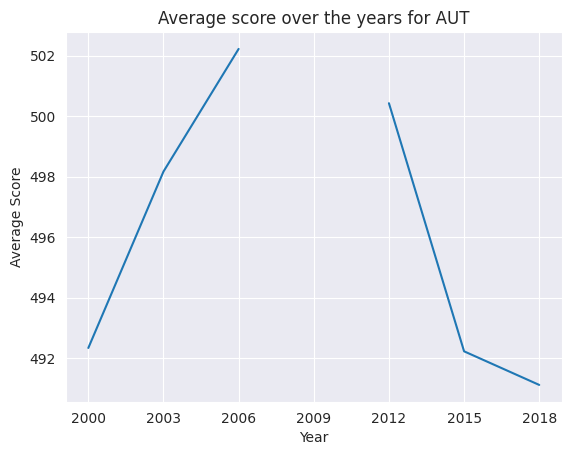

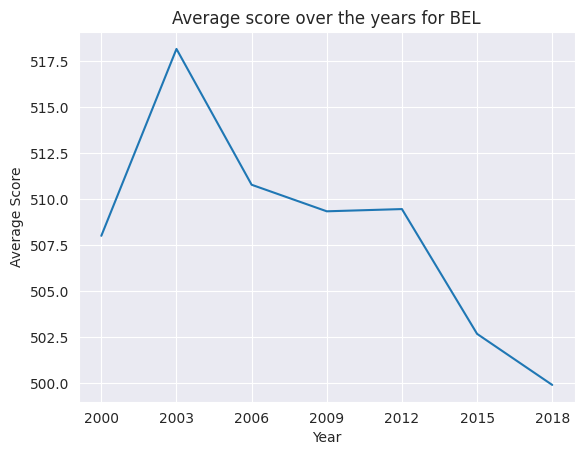

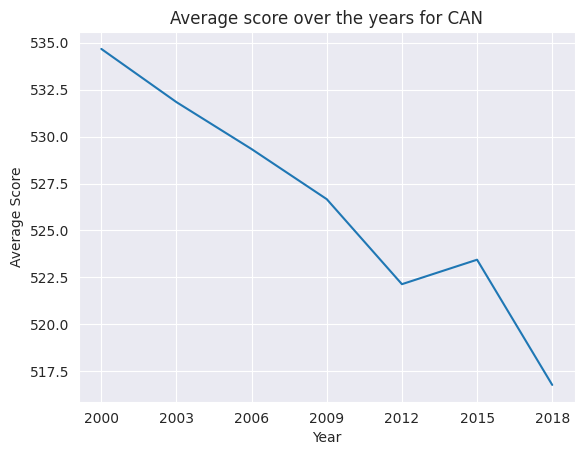

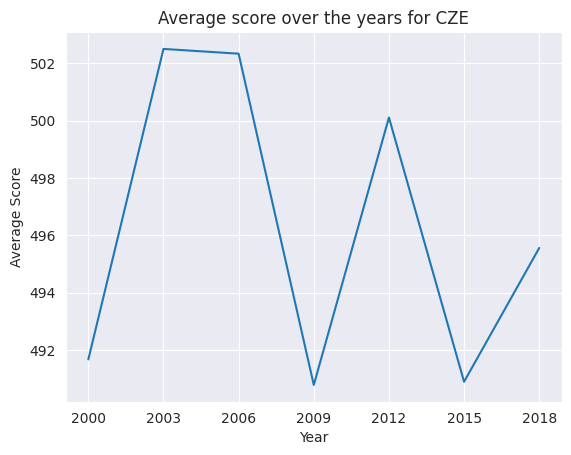

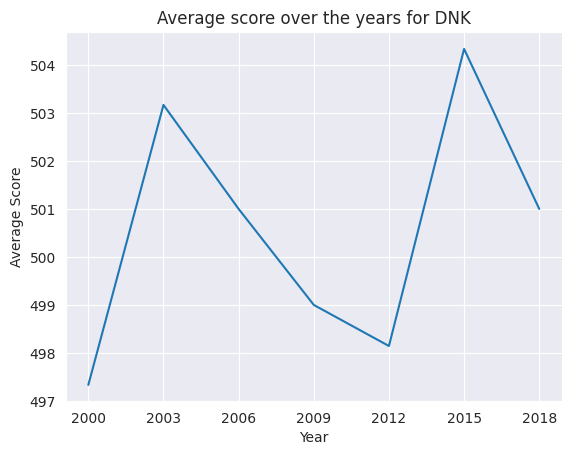

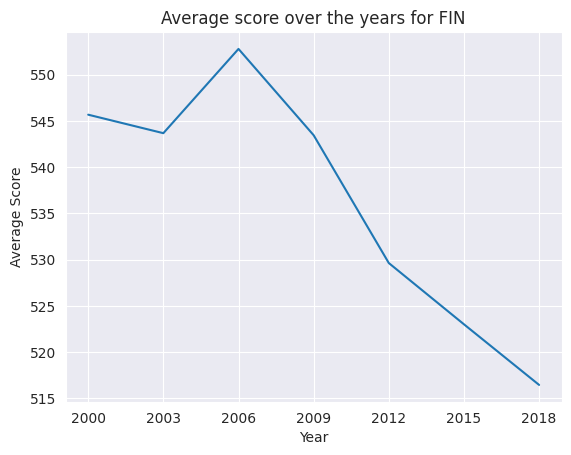

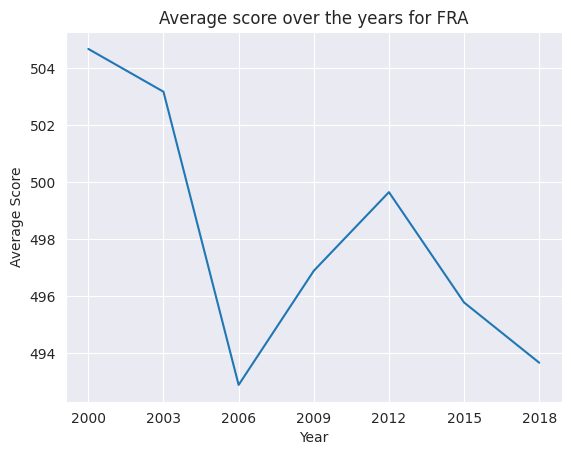

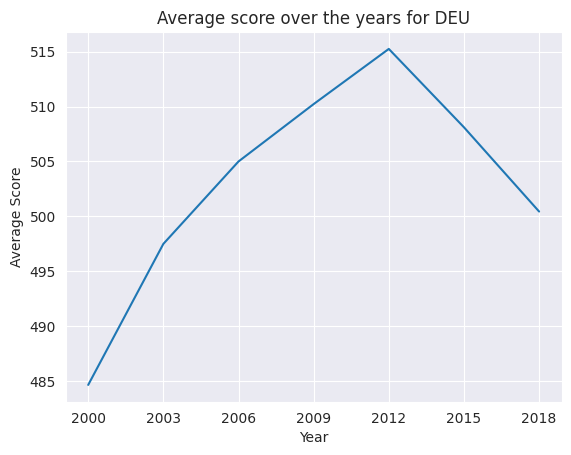

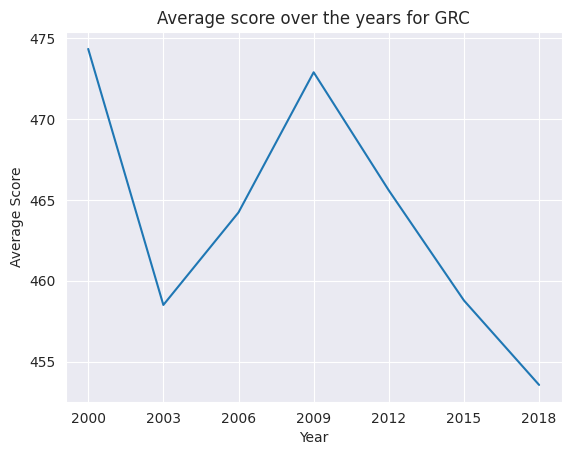

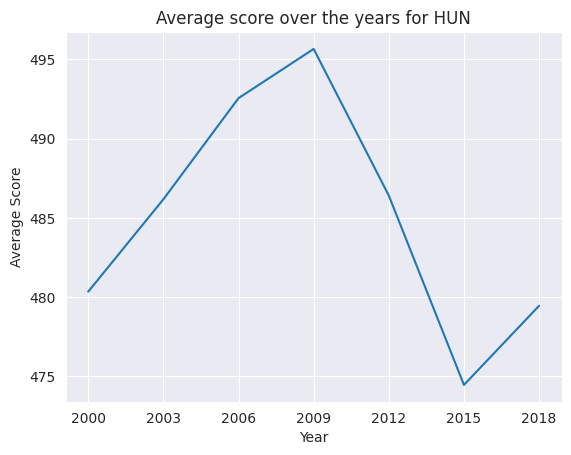

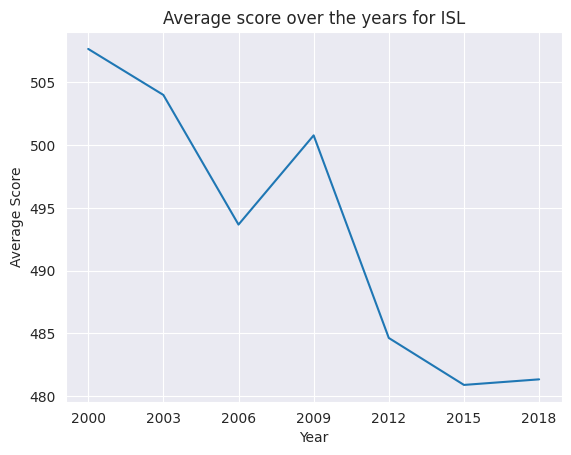

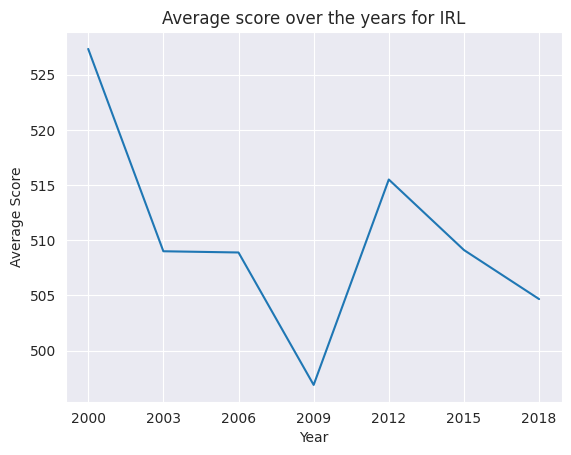

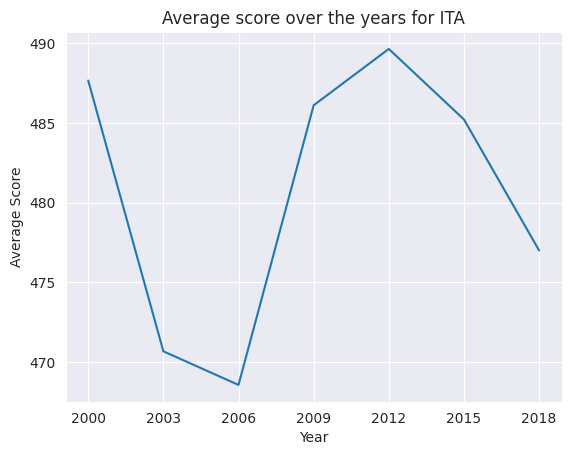

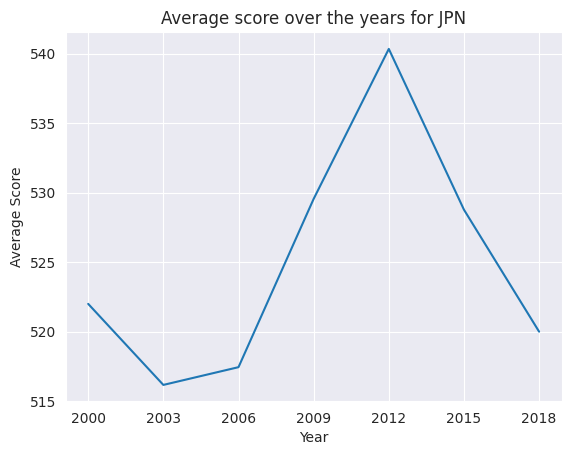

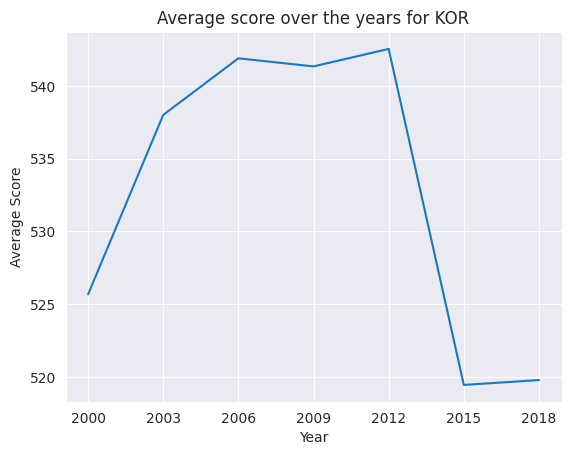

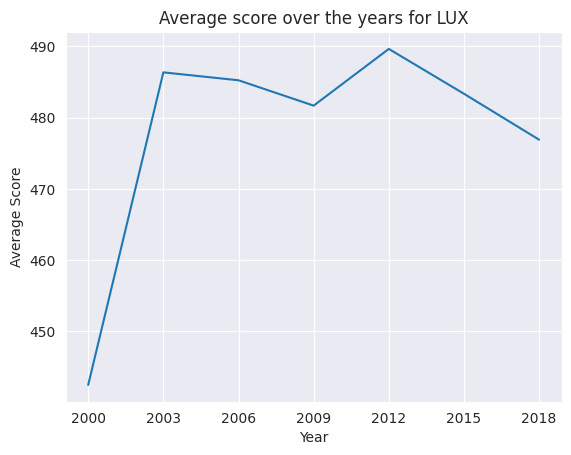

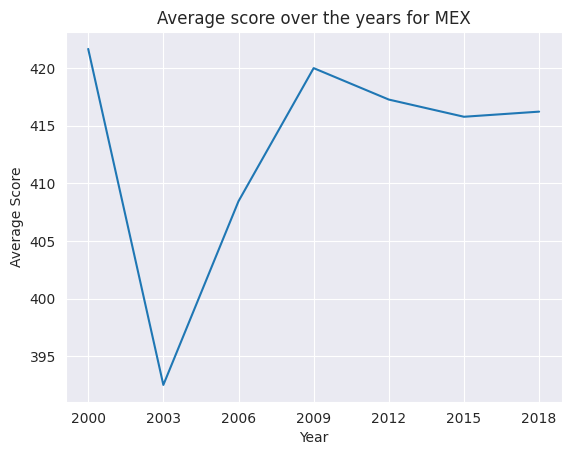

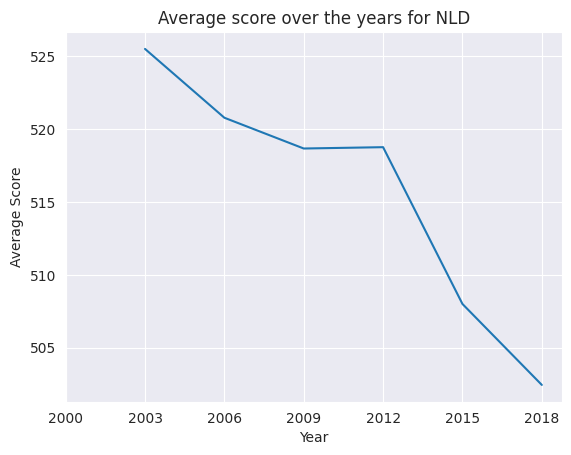

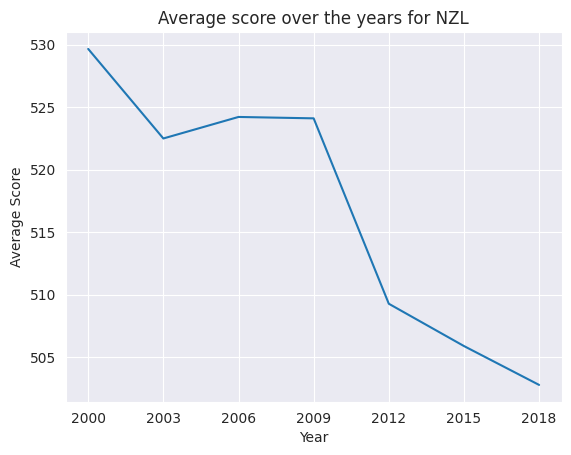

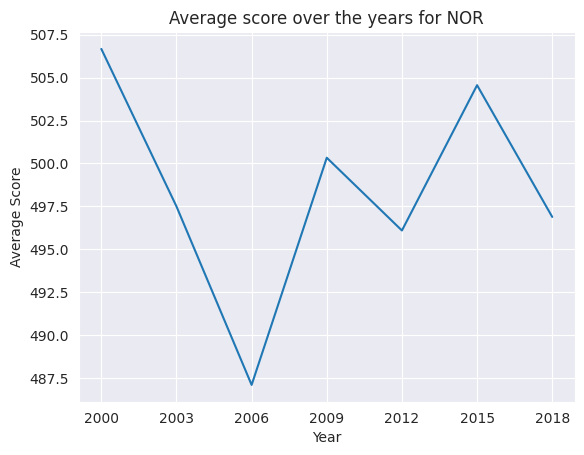

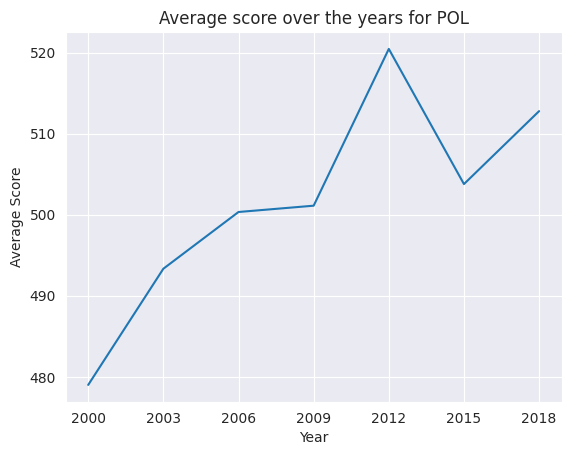

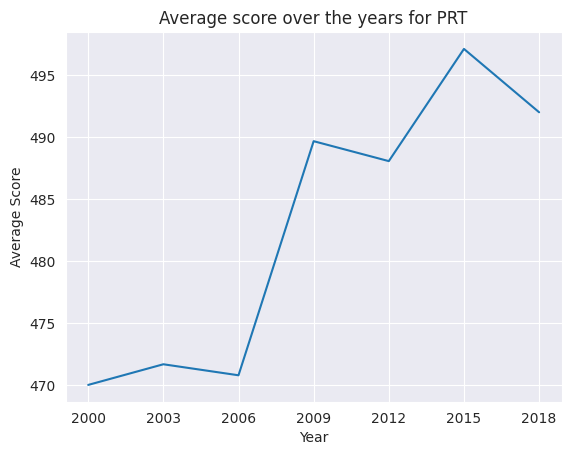

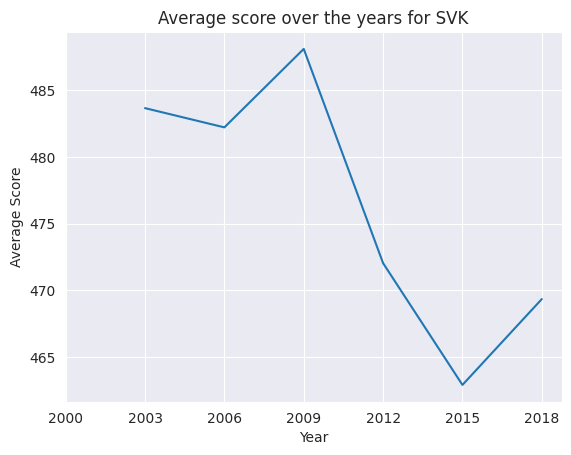

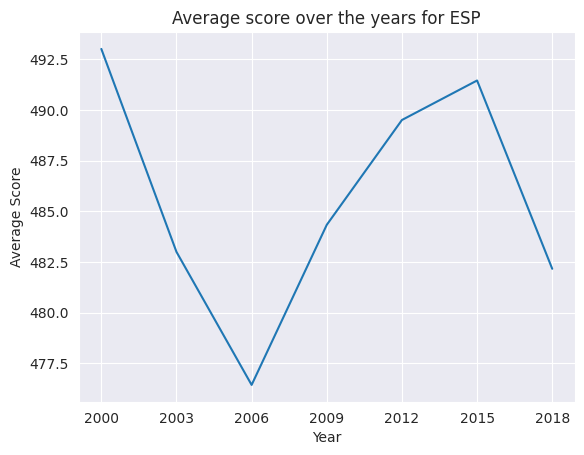

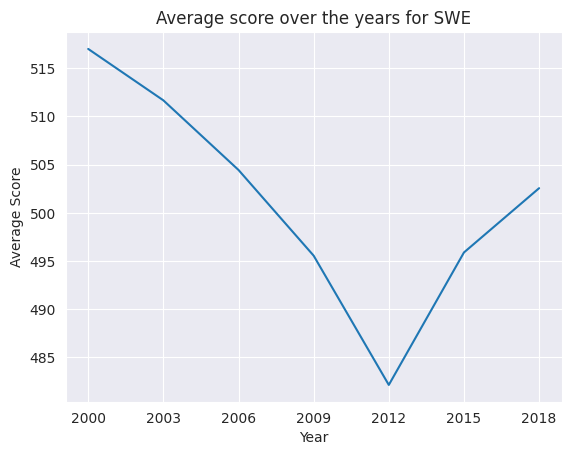

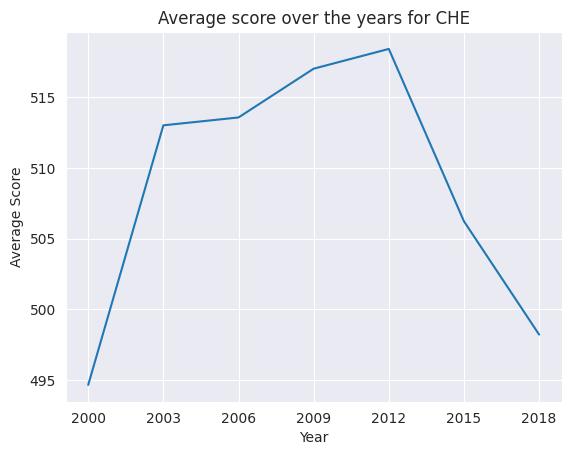

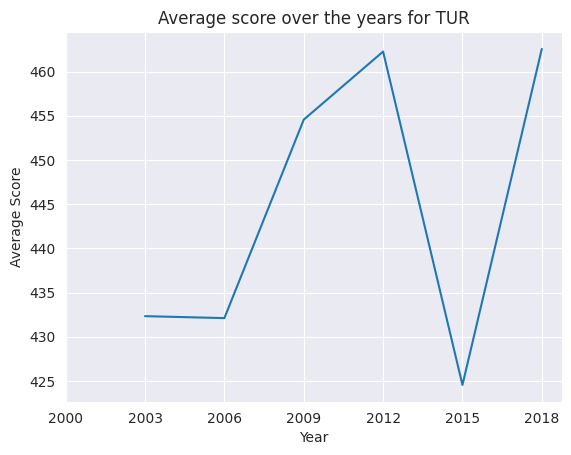

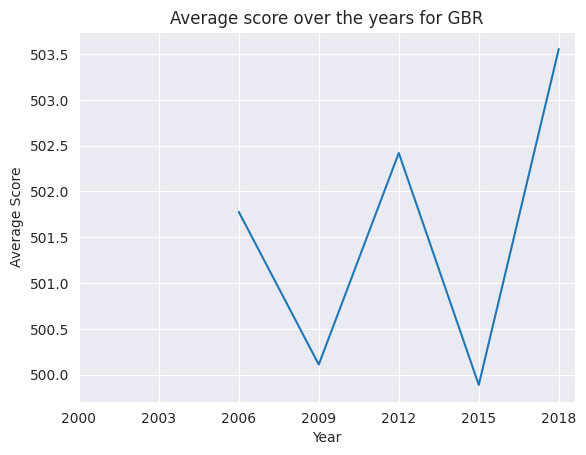

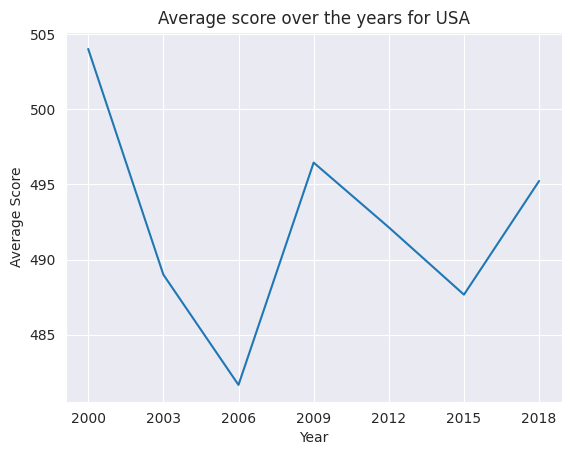

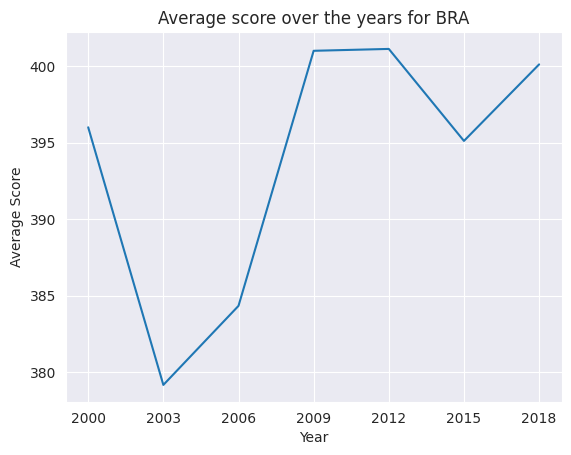

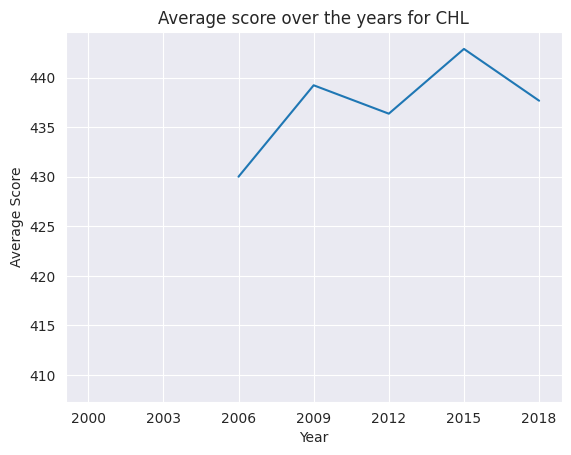

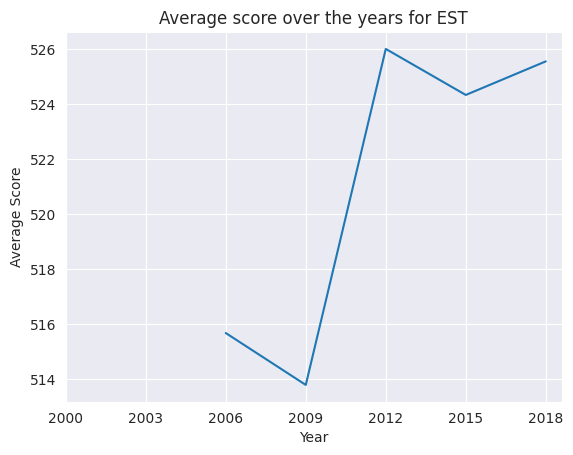

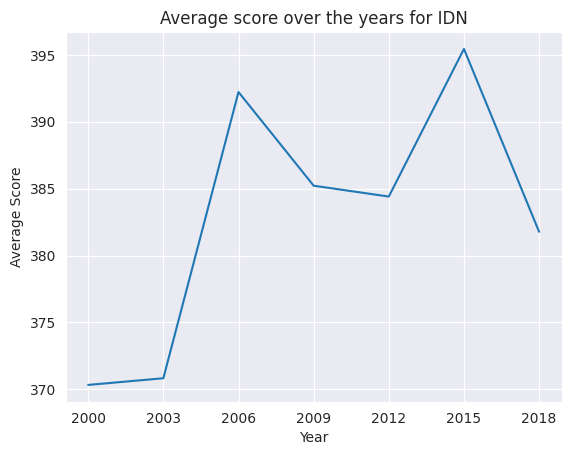

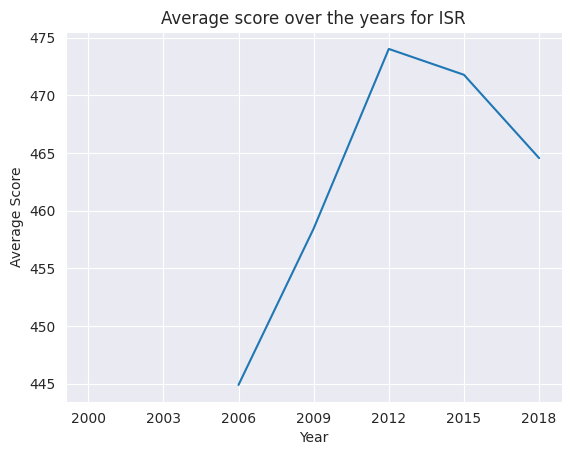

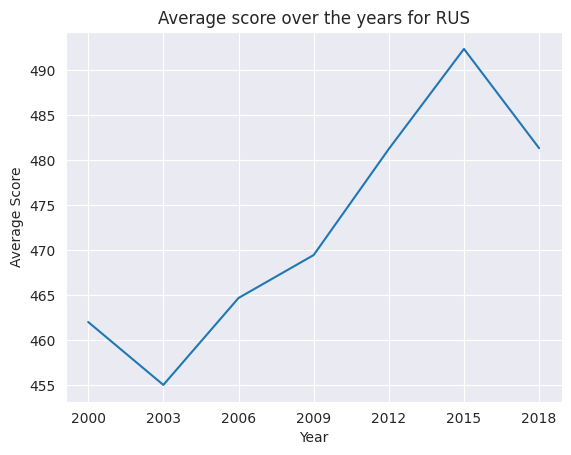

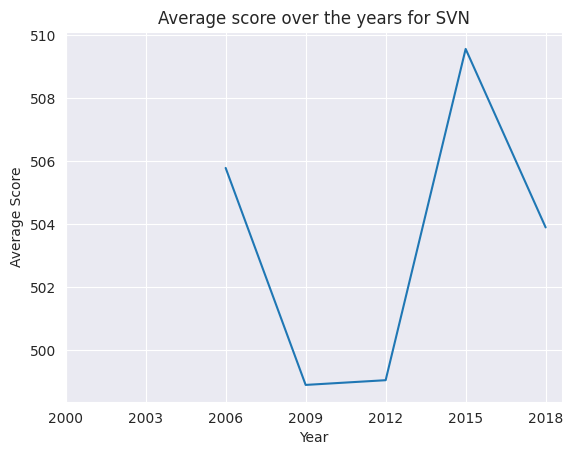

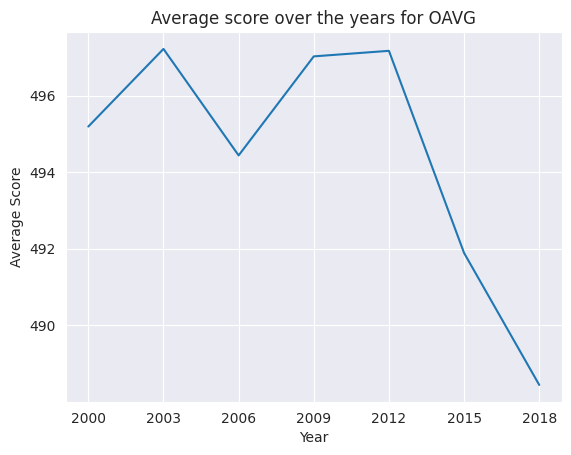

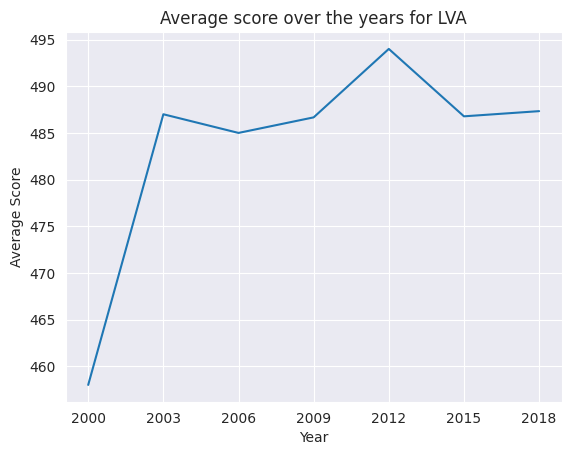

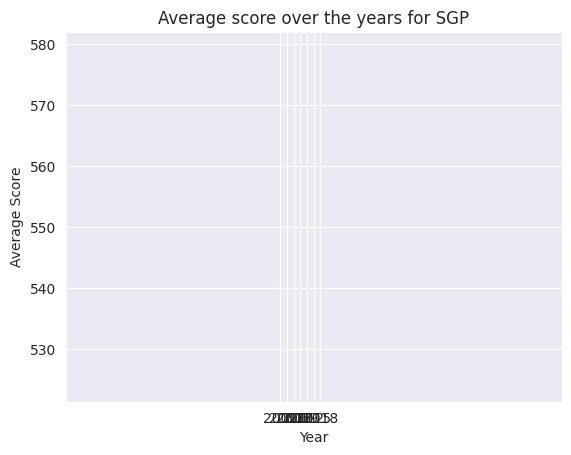

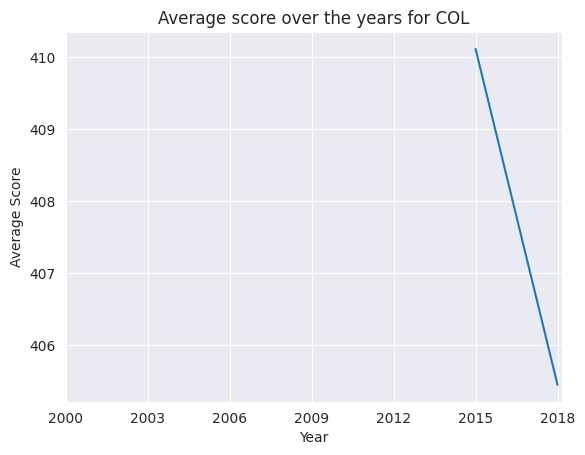

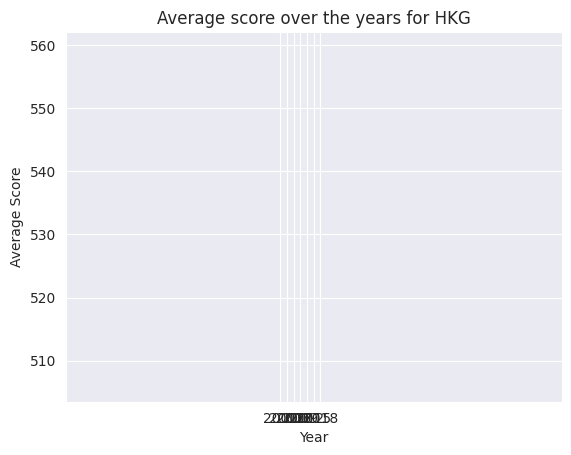

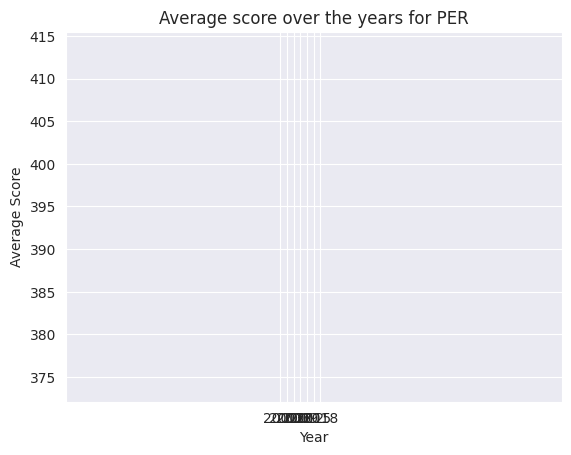

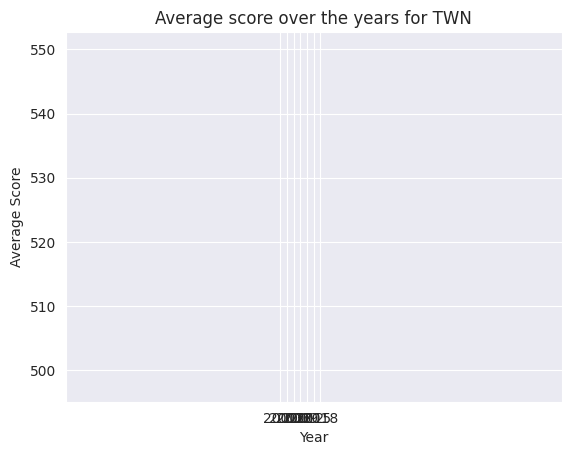

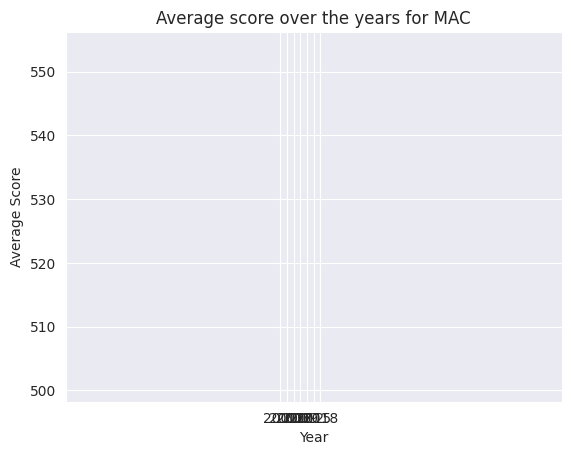

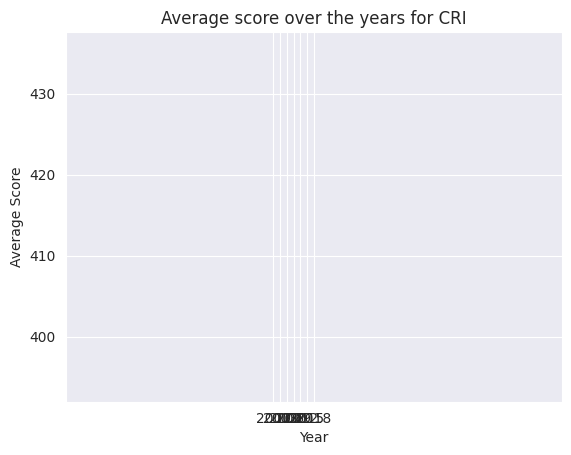

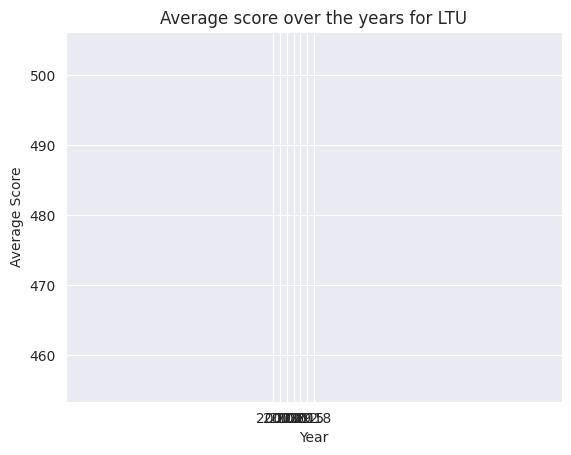

In [78]:
countries = PISA_df['LOCATION'].unique()
average_country = []

for i in countries:
  average_country.clear()
  loc = PISA_df[PISA_df['LOCATION']==i]


  for j in years:
    average_country.append(loc[loc['TIME']==j]['Value'].mean())


  plt.figure()
  plt.plot(years, average_country)
  plt.title(f'Average score over the years for {i}')
  plt.xlabel('Year')
  plt.xticks(years)
  plt.ylabel('Average Score')
  plt.show()







Even though they are countries with the highest scores, it can be observed how both Canada, Korea, and Finland have been experiencing a sustained decrease in their ratings: Canada since 2000, Finland since 2006, and Korea since 2002.

## Conclusions:

We observed an overall decrease in scores over the years, with this decline becoming more pronounced since 2012. A significant difference was noticed between girls' scores compared to boys' in reading skills. There was also a difference in favor of boys in mathematics and science, but it was much less pronounced.

